<a href="https://colab.research.google.com/github/anniemoriondo/cs480student/blob/main/01/CS480_Assignment_1_Moriondo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

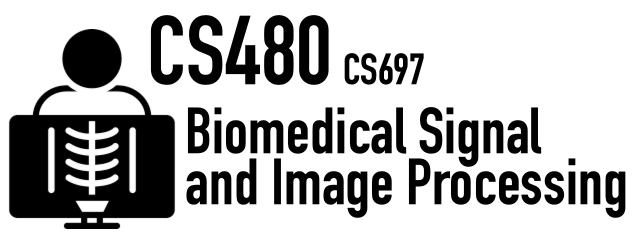
# Assignment 1


In [96]:
# Annie Moriondo
# Assignment 1
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [97]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [98]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz


**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

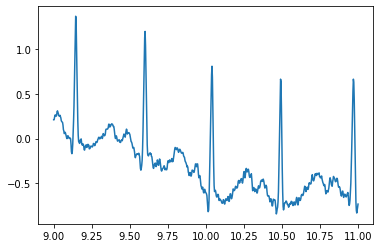

In [99]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

# Start and end of the data
start = 9 * SAMPLING_RATE
end = 11 * SAMPLING_RATE
# Slice of the data comprising 9 seconds elapsed to 11 seconds elapsed
task1_slice = ecg[start:end]

def time_window(starttime, endtime):
  """Generate a list of time indices for samples."""
  time = []
  duration = endtime - starttime
  for i in range(int(duration * SAMPLING_RATE)):
    time.append(i/SAMPLING_RATE + starttime)
  return time

# Time indices in seconds for our sample range.
task1_time = time_window(9,11)

# For basics of Matplotlib operation, I consulted the Matplotlib tutorial: https://matplotlib.org/3.3.3/tutorials/index.html
task1, task1_axes = pyplot.subplots()
task1_axes.plot(task1_time, task1_slice)


**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [100]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline
# Answer: Yes, it's pretty easy to see the PQRST pattern although a couple of the S-T segments are noisy.

In [101]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [102]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [103]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


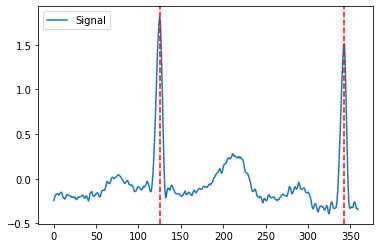

In [104]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

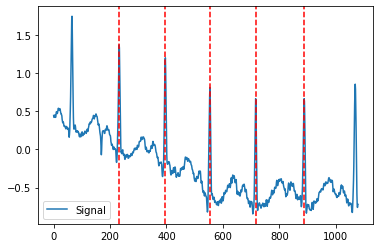

In [105]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

# Extend the start and end of the window by 0.5 second each side
ext_start = int(8.5 * SAMPLING_RATE)
ext_end = int(11.5 * SAMPLING_RATE)
task2_slice = ecg[ext_start:ext_end]

# Use neurokit2 to detect peaks as with the example above
_, task2_peaks = nk.ecg_peaks(task2_slice, sampling_rate=SAMPLING_RATE)

# Time elapsed in increments of 1 sample.
task2_time = time_window(8.5, 11.5)
task2_plot = nk.events_plot(task2_peaks['ECG_R_Peaks'][:], task2_slice)

**Task 3:** Detect Heartrate. [15 Points]

Intervals:  [218, 209, 196, 196, 186, 187, 184, 190, 189, 185, 186, 180, 177, 171, 177, 169, 167, 164, 158, 162, 172, 181, 181, 172, 170, 160, 172, 173, 166, 173, 178, 182, 192, 202, 204, 209, 202, 190, 190, 178, 185, 189, 178, 198, 202, 208, 206, 198, 190, 195, 195, 184, 185, 176, 194, 206, 196, 199, 196, 184, 185, 186, 187, 192, 184, 183, 197, 203, 200, 203, 195, 204, 204, 202, 210, 186, 203, 214, 213, 220, 420, 199, 197, 200, 202, 186, 203, 184, 253, 213, 176, 218, 190, 190, 190, 187, 190, 209, 216, 224, 191, 157, 301, 202, 204, 199, 196, 160, 264, 213, 211, 198, 202, 176, 219, 200, 189, 186, 194, 200, 203, 194, 200, 202, 200, 191, 190, 195, 205, 190, 298, 195, 235, 212, 208, 232, 225, 201, 223, 225, 218, 258, 218, 198, 257, 228, 189, 252, 221, 205, 245, 226, 216, 214, 210, 162, 261, 194, 200, 216, 216, 220, 252, 184, 218, 184, 168, 260, 197, 199, 203, 196, 934, 219, 149, 189, 192, 207, 213, 201, 271, 219, 218, 217, 197, 192, 214, 224, 222, 227, 215, 210, 214, 202, 200, 207, 222, 23

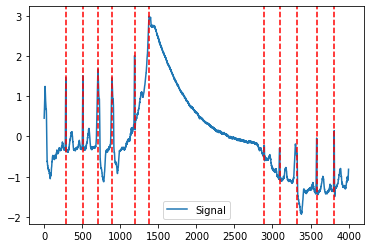

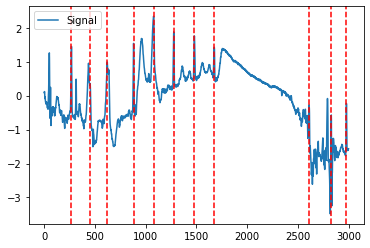

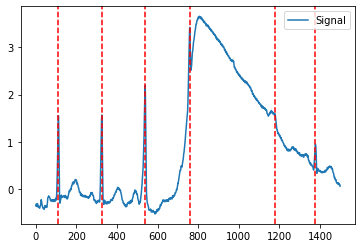

In [106]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 
intervals = []
peak_times = rpeaks['ECG_R_Peaks'][:]
max = peak_times[1] - peak_times[0] 
min = peak_times[1] - peak_times[0] 
for i in range(len(peak_times) - 1):
  interval = peak_times[i+1] - peak_times[i]
  intervals.append(interval)
  if interval > max:
    max = interval
    # Print statement for use in detecting the outlier.
    # print(i)
  if interval < min:
    min = interval

# Numbers of samples between r-peaks:
print("Intervals: ", intervals)

# The last peak marks the end, so we will divide the interval by 1 less
avg_interval = (peak_times[-1] - peak_times[0]) / (len(peak_times) - 1)
print("Average interval: ", avg_interval)

# (beats / sample) * (samples / second) (seconds / minute) = beats/minute
heart_rate = (1/avg_interval) * SAMPLING_RATE * 60
print("Average heart rate: ", heart_rate)

# Based on the full sample, the patient appears to have a heart rate of about 100 bpm.
# However, there are some outliers.
print ("Minimum and maximum intervals: ", min, max)
print("Peak 359: ", peak_times[359])
print("Peak 360: ", peak_times[360])
print("Interval: ", peak_times[360] - peak_times[359])
print("Peak 172: ", peak_times[172])
print("Peak 173: ", peak_times[173])
print("Interval: ", peak_times[173] - peak_times[172])
print("Peak 79: ", peak_times[79])
print("Peak 80: ", peak_times[80])
print("Peak 81: ", peak_times[81])
print("Intervals: ", peak_times[80] - peak_times[79], peak_times[81] - peak_times[80])
# What happened during these time windows? Let's find and plot the peaks.
outlier_slice1 = ecg[74000:78000]
_, check_outlier1 = nk.ecg_peaks(outlier_slice1, sampling_rate=SAMPLING_RATE)
outlier_plot1 = nk.events_plot(check_outlier1['ECG_R_Peaks'], outlier_slice1)

outlier_slice2 = ecg[33000:36000]
_, check_outlier2 = nk.ecg_peaks(outlier_slice2, sampling_rate=SAMPLING_RATE)
outlier_plot2 = nk.events_plot(check_outlier2['ECG_R_Peaks'], outlier_slice2)

outlier_slice3 = ecg[14500:16000]
_, check_outlier3 = nk.ecg_peaks(outlier_slice3, sampling_rate=SAMPLING_RATE)
outlier_plot3 = nk.events_plot(check_outlier3['ECG_R_Peaks'], outlier_slice3)

# I'm not sure what happened at these point - equipment malfunction or medical emergency?
# Either way, let's recalculate the heart rate based on the time prior to the first anomaly, for comparison.
slice_intervals = []
slice_max = peak_times[1] - peak_times[0] 
slice_min = peak_times[1] - peak_times[0] 
for i in range(75):
  interval = peak_times[i+1] - peak_times[i]
  slice_intervals.append(interval)
  if interval > slice_max:
    print(i)
    slice_max = interval
  if interval < slice_min:
    slice_min = interval
print("Updated minimum and maximum: ", slice_min, slice_max)

# Calculate the average interval size before the first anomaly shows up
updated_avg = (peak_times[76] - peak_times[0]) / 76
print("Updated average interval: ", updated_avg)

# (beats / sample) * (samples / second) (seconds / minute) = beats/minute
updated_hr = (1/updated_avg) * SAMPLING_RATE * 60
print("Updated average heart rate: ", updated_hr)

# Based on this selective calculation, the heart rate is approximately 115 bpm.


**Task 4:** Detect P Q S T Peaks. [25 Points]

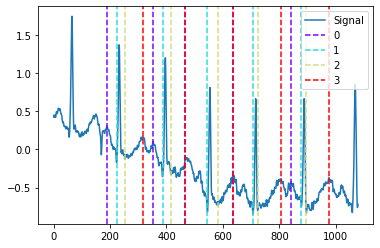

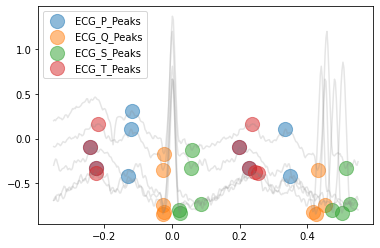

In [107]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

# All peaks highlighted using events plot
_, task4_peaks = nk.ecg_delineate(task2_slice, task2_peaks, sampling_rate=SAMPLING_RATE)
task4_plot = nk.events_plot([task4_peaks['ECG_P_Peaks'], 
                            task4_peaks['ECG_Q_Peaks'],
                            task4_peaks['ECG_S_Peaks'],
                            task4_peaks['ECG_T_Peaks']], task2_slice)

# Show function
_, task4_show = nk.ecg_delineate(task2_slice, task2_peaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [108]:
# TODO Does the detection work well?
print('P peaks: ' + str(task4_peaks['ECG_P_Peaks']))
print('Q peaks: ' + str(task4_peaks['ECG_Q_Peaks']))
print('S peaks: ' + str(task4_peaks['ECG_S_Peaks']))
print('T peaks: ' + str(task4_peaks['ECG_T_Peaks']))

# The detection identified the T peak of the second wave and the P peak of the third wave as the same sample.
# Other than that, it appears to have identified all the features.
# Whether this counts as working well depends on our definition - it may be close enough for some purposes.

P peaks: [189, 352, 467, 635, 841]
Q peaks: [223, 386, 545, 706, 878]
S peaks: [253, 416, 584, 723, 896]
T peaks: [317, 467, 635, 807, 976]


**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

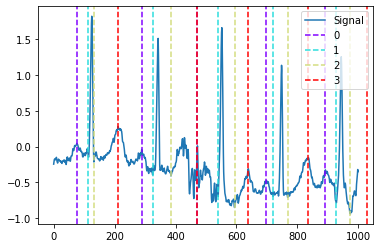

In [109]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

# We already detected all of the rpeaks, above, so we can use that.
_, bonus_peaks = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE)
bonus_plot = nk.events_plot([bonus_peaks['ECG_P_Peaks'][:5], 
                            bonus_peaks['ECG_Q_Peaks'][:5],
                            bonus_peaks['ECG_S_Peaks'][:5],
                            bonus_peaks['ECG_T_Peaks'][:5]], ecg[:1000])

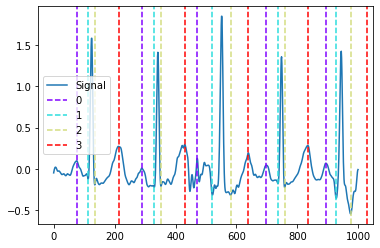

In [110]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

# Since the patient's heartbeat is about 115 bpm, a high pass at 1800 bpm would remove noise at a frequency of about 16/beat.
# print(1800/115)
# I consulted the NeuroKit docs for how to pass parameters as bpm:
# https://neurokit2.readthedocs.io/en/latest/_modules/neurokit2/signal/signal_filter.html?highlight=signal_filter
# 1800 beats / minute  * 1 minute / 60 seconds = 1800/60 Hz
# I also filtered for 55 bpm -  about half the frequency of the heartbeat. 
# This produced a more even baseline, so there did appear to be some low frequency noise.
ecg_filtered = nk.signal_filter(ecg, sampling_rate=SAMPLING_RATE, lowcut=55/60, highcut=1800/60)
_, filtered_peaks = nk.ecg_delineate(ecg_filtered, rpeaks, sampling_rate=SAMPLING_RATE)
filtered_plot = nk.events_plot([filtered_peaks['ECG_P_Peaks'][:5],
                                filtered_peaks['ECG_Q_Peaks'][:5],
                                filtered_peaks['ECG_S_Peaks'][:5],
                                filtered_peaks['ECG_T_Peaks'][:5]], ecg_filtered[:1000])

In [111]:
# TODO Does the filtering improve the result?
# Yes, the filtering improves the result pretty dramatically in terms of the regularity of the detected peaks.

In [112]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#